In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import scipy.io as sio
from torchsummary import summary

import os

import warnings
warnings.filterwarnings('ignore')

from include import *
from PIL import Image
import PIL

import numpy as np
import torch
import torch.optim
from torch.autograd import Variable
import pdb

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    dtype = torch.cuda.FloatTensor
    #os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor

H_org = sio.loadmat("H_64x64x64_exp.mat")
interference = sio.loadmat("interference.mat")
int_extracted = interference['interference']
array = ['noisy_0dB', 'noisy_5dB', 'noisy_10dB', 'noisy_15dB', 'noisy_20dB']
save_array = ['vect_noise_64.mat','vect_noise_64_2.mat','vect_noise_64_3.mat','vect_noise_64_4.mat','vect_noise_64_5.mat']
length = 20
vect_noise = np.zeros((64,64,64,len(save_array),length),dtype=complex)
for k in range(length): 
    H_extracted = H_org['noiseless']
    img_np_real = np.real(H_extracted[:,:,:,k])
    img_np_imag = np.imag(H_extracted[:,:,:,k])
    img_np = np.zeros((128,64,64))
    img_np[0:64,:,:,] = np.transpose(img_np_real,(2,0,1))
    img_np[64:128,:,:] = np.transpose(img_np_imag,(2,0,1))
    img_clean_var = np_to_var(img_np).type(dtype)
    output_depth = img_np.shape[0] 
    print("Image size: ", img_np.shape)
    i = 0
    for noise_level in array:
        H_extracted = H_org[noise_level]
        img_noisy_np_real = np.real(H_extracted[:,:,:,0,k])#+ int_extracted[:,:,:,k])
        img_noisy_np_imag = np.imag(H_extracted[:,:,:,0,k])# + int_extracted[:,:,:,k])
        img_noisy_np = np.zeros((128,64,64))
        img_noisy_np[0:64,:,:] = np.transpose(img_noisy_np_real,(2,0,1))
        img_noisy_np[64:128,:,:] = np.transpose(img_noisy_np_imag,(2,0,1))
        img_noisy_var = np_to_var(img_noisy_np).type(dtype)
        def denoise(img_noisy_var,k=64,numit = 200,rn = 0.0,find_best=True,upsample_first = True):
            num_channels = [k]*5
            net = decodernw(output_depth,num_channels_up=num_channels,upsample_first=upsample_first).type(dtype)
            #summary(net, (k,2,2))
            #pdb.set_trace()
            mse_n, mse_t, ni, net = fit( num_channels=num_channels,
                                reg_noise_std=rn,
                                num_iter=numit,
                                img_noisy_var=img_noisy_var,
                                net=net,
                                img_clean_var=img_clean_var,
                                find_best=find_best
                                )
            out_img_np = net( ni.type(dtype) ).data.cpu().numpy()[0]
            return out_img_np, mse_t
        out_img_np, mse_t = denoise(img_noisy_var,k=16,numit = 1970,rn = 0.0)
        img_np_real_allcol = np.transpose(out_img_np[0:64,:,:],(1,2,0)) 
        img_np_imag_allcol = np.transpose(out_img_np[64:128,:,:],(1,2,0))
        img_np_real = np.tile(np.reshape(img_np_real_allcol[:,0,:],(64,1,64)),(1,64,1))
        img_np_imag = np.tile(np.reshape(img_np_imag_allcol[:,0,:],(64,1,64)),(1,64,1))
        vect_noise[:,:,:,i,k] = np.array(img_np_real+1j*img_np_imag,dtype=complex)
        i = i+1
i = 0
for noise_level in array:       
    sio.savemat(save_array[i], {'vect_noise':vect_noise[:,:,:,i,:]})
    i = i+1

num GPUs 2
Image size:  (128, 64, 64)
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
Image size:  (128, 64, 64)
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
Image size:  (128, 64, 64)
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
shape:  [1, 16, 2, 2]
optimize with adam 0.01
Safety check2
Image si

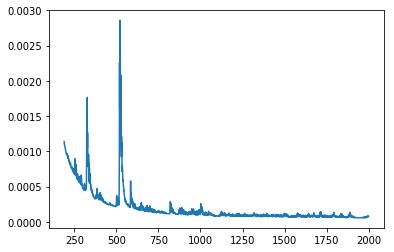

In [27]:
plt.plot(range(190,2000),mse_t[190:2000])

In [3]:
np.amin(mse_t)

0.00047794266720302403

In [5]:
mse_t[999]

0.0006331407348625362